In [2]:
# importing libraries
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

<img src="studysleepnetworkfinal.png">

In [3]:
# loading data for study sleep problem
sleep_study_data = np.loadtxt("sleep_study.csv", delimiter=",")
sleep_study_data_normalized = np.loadtxt("sleep_study_normalized.csv", delimiter=",")
print sleep_study_data[1:10]
#print sleep_study_data_normalized[:10]

[[  5.   8.  55.]
 [  3.  12.  23.]
 [  4.   9.  82.]
 [ 10.   4.  99.]
 [ 10.   3.  92.]
 [  2.  13.  36.]
 [ 11.   3.  87.]
 [  6.   8.  75.]
 [  8.   3.  95.]]


In [4]:
# define function for getting data of given batchsize
def getData(batch_size):
    """study, sleep, score data"""
    start_index = random.randint(0, 3000)
    end_index = start_index + batch_size
    return sleep_study_data_normalized[start_index:end_index]

<img src="in.png">

In [5]:
# creating placeholders for input data and final marks
inputs = tf.placeholder("float", [None, 2], name="inputs")
marks = tf.placeholder("float", [None, 1], name="marks")

<img src="w1.png">

In [6]:
# initializing hidden layer weights
initial_wHidden = tf.random_uniform([2, 3], -1.0, 1.0)
wHidden = tf.Variable(initial_wHidden, name="wHidden", dtype="float32")

<img src="w2.png">

In [7]:
# initializing output layer weights
initial_wOutput = tf.random_uniform([3, 1], -1.0, 1.0)
wOutput = tf.Variable(initial_wOutput, name="wOutput", dtype="float32")

<img src="layer1.png">

In [8]:
# starting computation
hidden_layer = 1*tf.matmul(inputs, wHidden)

<img src="layer2.png">

In [9]:
# apply sigmoid activation on outputs to normalize final output
output_layer = tf.sigmoid(tf.matmul(hidden_layer, wOutput))

In [10]:
# calculate loss
loss = tf.reduce_mean(tf.abs(output_layer - marks))

In [11]:
# initalize optimizer
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

In [12]:
# final step - optimize i.e apply back propogation step to minimize loss
train = optimizer.minimize(loss)

In [13]:
# start a session
with tf.Session() as sess:
    
    # initialize all the weight variables
    init_op = tf.global_variables_initializer()
    sess.run(init_op)

    batch_size = 64
    plot_step, plot_loss = [], []
    
    # start the training process
    for i in range(10000):
        trainData = getData(batch_size)
        train_inputs = trainData[:,:2].astype("float32")
        train_marks = trainData[:,2:3].astype("float32")
        train_loss, _ = sess.run([loss, train],
                                     feed_dict={inputs:train_inputs, marks:train_marks})
        
        
                    
        if not i%100:
            print "Step %d - training loss: %g"%(i, train_loss)
            plot_step.append(i)
            plot_loss.append(train_loss)
    
    # saving the model
    #saver = tf.train.Saver()
    #saver.save(sess, "/home/siftr/apus/sleep_study_model.ckpt")
    #print "Model saved!"

Step 0 - training loss: 0.259979
Step 100 - training loss: 0.290858
Step 200 - training loss: 0.323539
Step 300 - training loss: 0.312336
Step 400 - training loss: 0.281918
Step 500 - training loss: 0.259343
Step 600 - training loss: 0.304393
Step 700 - training loss: 0.287111
Step 800 - training loss: 0.31671
Step 900 - training loss: 0.299398
Step 1000 - training loss: 0.243279
Step 1100 - training loss: 0.288045
Step 1200 - training loss: 0.281426
Step 1300 - training loss: 0.254851
Step 1400 - training loss: 0.298024
Step 1500 - training loss: 0.283139
Step 1600 - training loss: 0.285355
Step 1700 - training loss: 0.276415
Step 1800 - training loss: 0.268272
Step 1900 - training loss: 0.295255
Step 2000 - training loss: 0.279683
Step 2100 - training loss: 0.287573
Step 2200 - training loss: 0.271989
Step 2300 - training loss: 0.265052
Step 2400 - training loss: 0.246748
Step 2500 - training loss: 0.28324
Step 2600 - training loss: 0.241513
Step 2700 - training loss: 0.287079
Step 2

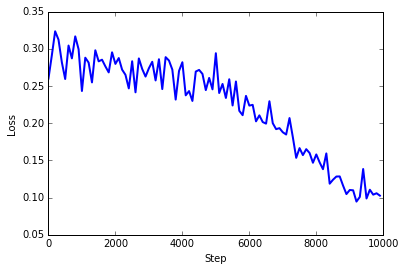

In [14]:
plt.plot(plot_step, plot_loss, linewidth=2.0)
plt.ylabel("Loss", )
plt.xlabel("Step")
plt.show()

In [15]:
# evaluating the trained model
with tf.Session() as sess2:
    saver = tf.train.Saver()
    saver.restore(sess2, "/home/siftr/apus/sleep_study_model.ckpt")
    
    # test input 1
    test_inputs = [[16/24., 9/24.]]
    pred_marks = sess2.run(output_layer, feed_dict={inputs:test_inputs})
    print pred_marks*100
    
    # test input 2
    test_inputs = [[12/24., 1/24.]]
    pred_marks = sess2.run(output_layer, feed_dict={inputs:test_inputs})
    print pred_marks*100
    
    # test input 3
    test_inputs = [[1/24., 18/24.]]
    pred_marks = sess2.run(output_layer, feed_dict={inputs:test_inputs})
    print pred_marks*100

INFO:tensorflow:Restoring parameters from /home/siftr/apus/sleep_study_model.ckpt
[[ 82.48294067]]
[[ 76.34546661]]
[[ 51.6885643]]


### Steps For Training Any Neural Network

* Get the data
* Define **Graph**
* Define **Loss fucntion**
* Define **Optimizer** that performs backpropogation
* Define **Session**
* Call the **run()** method providing it the data
* Save the weights once the network has been trained
* Test by restoring weights

### Installation Instructions - Ubuntu

In order to get this notebook running on you laptop kindly follow these steps:

* sudo apt-get update
* **Python 2.7 -** Ubuntu comes with python pre-installed
* **Numpy - **
    * sudo apt-get install python-numpy
    * sudo pip install numpy
* **Matplotlib -** sudo pip install matplotlib 
* **Jupyter Notebook -** sudo pip install jupyter
* **Tensorflow -** sudo pip install tensorflow